# Fantasy Football Analysis

## 1. Preparation

### 1.1.) Packages, Color Palettes, Data

In [399]:
# Packages 

import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
from pathlib import Path

from matplotlib.text import OffsetFrom

In [532]:
# Color Palettes

light_gray = "#E5E5E5" 
light_gray_2 = "#CECECE"

gray_1 = "#909090"
gray_2 = "#B1B1B1"

## Color Palette 1

orange_1 = "#fb7b50"
blue_1 = "#50d0fb"

## Color Palette 2

blue_2 = "#0078ee"
pink_2 = "#cd52c5"
red_2 = "#ff3f70"
orange_2 = "#ee7600"

## Color Palette 3

green_3 = "#004C54"
blue_3 = "#002244"
red_3 = "#E31837"
orange_3 = "#FF7900"
yellow_3 = "#FFD100"

In [62]:
# Read in our CSV file

DF = pd.read_csv("Resources/fantasy_merged_7_17.csv")
MainDF = DF.fillna(0)
MainDF.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
0,1,Todd Gurley,LAR,RB,23,15,15,0,0,0,...,64,788,12.31,6,5,2,383.3,GurlTo01,1.0,2017
1,2,Russell Wilson,SEA,QB,29,16,16,339,553,3983,...,0,0,0.00,0,14,3,347.9,WilsRu00,1.0,2017
2,3,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,...,85,655,7.71,2,3,2,341.6,BellLe00,2.0,2017
3,4,Alvin Kamara,NOR,RB,22,16,3,0,0,0,...,81,826,10.20,5,1,1,320.4,KamaAl00,3.0,2017
4,5,Antonio Brown,PIT,WR,29,14,14,0,0,0,...,101,1533,15.18,9,4,0,310.3,BrowAn04,1.0,2017


In [141]:
# Breakdown of MainDF into several years

MainDF2017 = MainDF[MainDF["Year"] == 2017]
MainDF2018 = MainDF[MainDF["Year"] == 2018]
MainDF2019 = MainDF[MainDF["Year"] == 2019]
MainDF2020 = MainDF[MainDF["Year"] == 2020]
MainDF2021 = MainDF[MainDF["Year"] == 2021]
MainDF2022 = MainDF[MainDF["Year"] == 2022]

MainDF2017.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
0,1,Todd Gurley,LAR,RB,23,15,15,0,0,0,...,64,788,12.31,6,5,2,383.3,GurlTo01,1.0,2017
1,2,Russell Wilson,SEA,QB,29,16,16,339,553,3983,...,0,0,0.00,0,14,3,347.9,WilsRu00,1.0,2017
2,3,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,...,85,655,7.71,2,3,2,341.6,BellLe00,2.0,2017
3,4,Alvin Kamara,NOR,RB,22,16,3,0,0,0,...,81,826,10.20,5,1,1,320.4,KamaAl00,3.0,2017
4,5,Antonio Brown,PIT,WR,29,14,14,0,0,0,...,101,1533,15.18,9,4,0,310.3,BrowAn04,1.0,2017


### 1.2.) Data Cleaning

In [116]:
# Remove outliers
CleanedMainDF = MainDF[MainDF["Player"] != "Tom Brady"]
CleanedMainDF.head()


,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
0,1,Todd Gurley,LAR,RB,23,15,15,0,0,0,...,64,788,12.31,6,5,2,383.3,GurlTo01,1.0,2017
1,2,Russell Wilson,SEA,QB,29,16,16,339,553,3983,...,0,0,0.00,0,14,3,347.9,WilsRu00,1.0,2017
2,3,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,...,85,655,7.71,2,3,2,341.6,BellLe00,2.0,2017
3,4,Alvin Kamara,NOR,RB,22,16,3,0,0,0,...,81,826,10.20,5,1,1,320.4,KamaAl00,3.0,2017
4,5,Antonio Brown,PIT,WR,29,14,14,0,0,0,...,101,1533,15.18,9,4,0,310.3,BrowAn04,1.0,2017


In [124]:
MainDF.groupby(by = "FantPos").mean()["Age"]

/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_9766/3163654149.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MainDF.groupby(by = "FantPos").mean()["Age"]


FantPos
QB    28.417749
RB    25.437566
TE    26.465976
WR    25.705474
Name: Age, dtype: float64

In [122]:
MainDF.groupby(by = "FantPos").median()["Age"]

/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_9766/4222461470.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MainDF.groupby(by = "FantPos").median()["Age"]


FantPos
QB    27.0
RB    25.0
TE    26.0
WR    25.0
Name: Age, dtype: float64

In [123]:
CleanedMainDF.groupby(by = "FantPos").mean()["Age"]

/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_9766/1831784486.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CleanedMainDF.groupby(by = "FantPos").mean()["Age"]


FantPos
QB    28.232456
RB    25.437566
TE    26.465976
WR    25.705474
Name: Age, dtype: float64

In [121]:
CleanedMainDF.groupby(by = "FantPos").median()["Age"]

/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_9766/1275151186.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CleanedMainDF.groupby(by = "FantPos").median()["Age"]


FantPos
QB    27.0
RB    25.0
TE    26.0
WR    25.0
Name: Age, dtype: float64

In [113]:
MainDF[MainDF["FantPos"] == "RB"].mean()["Age"]

/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_9766/4027607123.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  MainDF[MainDF["FantPos"] == "RB"].mean()["Age"]


25.43756558237146

In [42]:
MainDF2017[MainDF2017["Age"] == 37]

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
117,118,Ben Watson,BAL,TE,37,16,12,0,0,0,...,61,522,8.56,4,1,0,137.2,WatsBe00,11.0,2017
201,202,Antonio Gates,LAC,TE,37,16,4,0,0,0,...,30,316,10.53,3,0,0,79.6,GateAn00,28.0,2017


In [31]:
MainDF.groupby(by = "FantPos").mean()["PPR"].sort_values(ascending = False)

/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_9766/878873537.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MainDF.groupby(by = "FantPos").mean()["PPR"].sort_values(ascending = False)


FantPos
QB    114.617100
WR     82.491981
RB     77.456243
TE     55.675444
Name: PPR, dtype: float64

## 2. Analysis

### 2.1.) Which season had the most fantasy total points?

In [6]:
# Create series by using group_by

fantasy_total_points_per_year = MainDF.groupby(by = "Year").sum()["PPR"]

# Create a dataframe

FantasyTotalPointsDF = pd.DataFrame({
    "Year": list(fantasy_total_points_per_year.index),
    "Total Fantasy Points": list(fantasy_total_points_per_year) 
})

FantasyTotalPointsDF

/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_9766/4019654537.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fantasy_total_points_per_year = MainDF.groupby(by = "Year").sum()["PPR"]


,Year,Total Fantasy Points
0,2017,42014.4
1,2018,45322.4
2,2019,44588.2
3,2020,46971.9
4,2021,47279.0
5,2022,45221.7


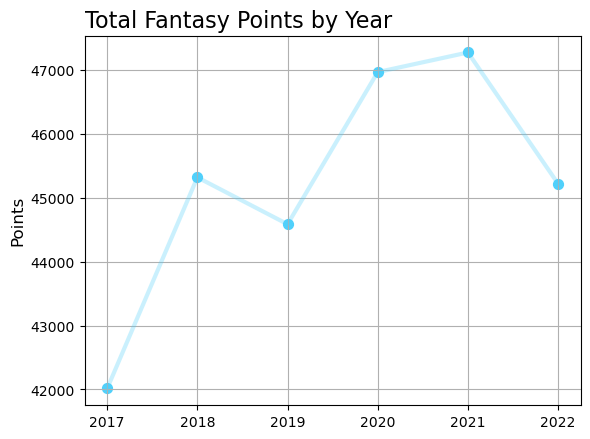

In [47]:
plt.scatter(FantasyTotalPointsDF["Year"],
            FantasyTotalPointsDF["Total Fantasy Points"],
            color = blue_1,
            s = 50)
plt.plot(FantasyTotalPointsDF["Year"],
         FantasyTotalPointsDF["Total Fantasy Points"],
         linewidth = 3,
         color = blue_1,
         alpha = .3)
plt.title(label = "Total Fantasy Points by Year",
          loc = "left",
          fontsize = 16)
plt.ylabel(ylabel = "Points",
           fontsize = 12)
plt.grid()

### 2.2.) What is the relationship between fantasy points and age of the players.

 - In order to analyze the average fantasy points and the age of the players we may need to remove outliers (e.g. Tom Brady) 

#### 2.2.a) Average fantasy points and age

In [43]:
MainDF.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
0,1,Todd Gurley,LAR,RB,23,15,15,0,0,0,...,64,788,12.31,6,5,2,383.3,GurlTo01,1.0,2017
1,2,Russell Wilson,SEA,QB,29,16,16,339,553,3983,...,0,0,0.00,0,14,3,347.9,WilsRu00,1.0,2017
2,3,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,...,85,655,7.71,2,3,2,341.6,BellLe00,2.0,2017
3,4,Alvin Kamara,NOR,RB,22,16,3,0,0,0,...,81,826,10.20,5,1,1,320.4,KamaAl00,3.0,2017
4,5,Antonio Brown,PIT,WR,29,14,14,0,0,0,...,101,1533,15.18,9,4,0,310.3,BrowAn04,1.0,2017


In [60]:
AverageFantasyPoints = MainDF.groupby(by = "Age").mean()["PPR"]

AverageFantasyPoints2017 = MainDF2017.groupby(by = "Age").mean()["PPR"]
AverageFantasyPoints2018 = MainDF2018.groupby(by = "Age").mean()["PPR"]
AverageFantasyPoints2019 = MainDF2019.groupby(by = "Age").mean()["PPR"]
AverageFantasyPoints2020 = MainDF2020.groupby(by = "Age").mean()["PPR"]
AverageFantasyPoints2021 = MainDF2021.groupby(by = "Age").mean()["PPR"]

/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_9766/1749886066.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  AverageFantasyPoints = MainDF.groupby(by = "Age").mean()["PPR"]
/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_9766/1749886066.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  AverageFantasyPoints2017 = MainDF2017.groupby(by = "Age").mean()["PPR"]
/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_9766/1749886066.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to Fals

Text(0, 0.5, 'Fantasy Points')

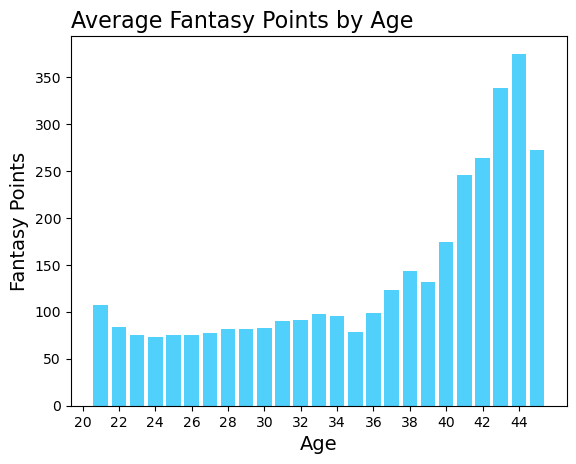

In [46]:
plt.bar(x = AverageFantasyPoints.index,
        height = list(AverageFantasyPoints),
        color = blue_1)
plt.title(label = "Average Fantasy Points by Age",
          loc = "left",
          fontsize = 16)

plt.xticks(np.arange(min(MainDF["Age"]) - 1, max(MainDF["Age"])  + 1 ,2))

plt.xlabel(xlabel = "Age",
           fontsize = 14)
plt.ylabel(ylabel = "Fantasy Points",
           fontsize = 14)

#### 2.2.b.) Average fantasy points and age by year

Text(0, 0.5, 'Fantasy Points')

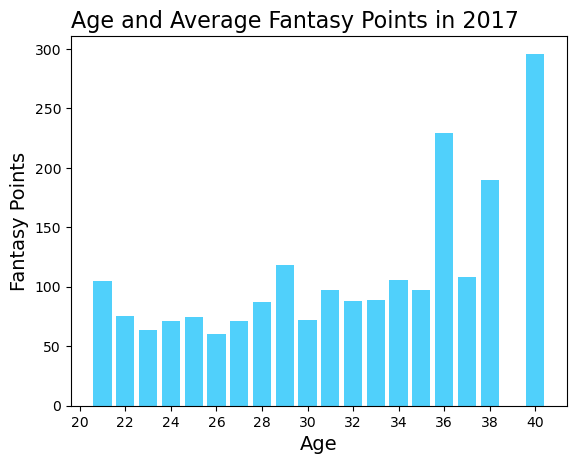

In [99]:
plt.bar(x = AverageFantasyPoints2017.index,
        height = list(AverageFantasyPoints2017),
        color = blue_1)
plt.title(label = "Age and Average Fantasy Points in 2017",
          loc = "left",
          fontsize = 16)
plt.xticks(np.arange(min(MainDF2017["Age"]) - 1, max(MainDF2017["Age"])  + 1 ,2))

plt.xlabel(xlabel = "Age",
           fontsize = 14)
plt.ylabel(ylabel = "Fantasy Points",
           fontsize = 14)

Text(0, 0.5, 'Fantasy Points')

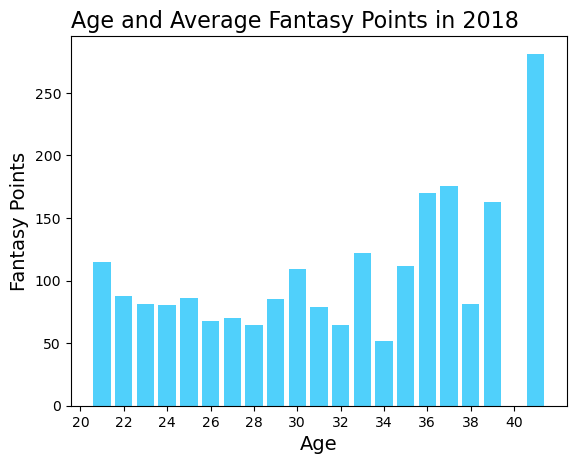

In [100]:
plt.bar(x = AverageFantasyPoints2018.index,
        height = list(AverageFantasyPoints2018),
        color = blue_1)
plt.title(label = "Age and Average Fantasy Points in 2018",
          loc = "left",
          fontsize = 16)
plt.xticks(np.arange(min(MainDF2018["Age"]) - 1, max(MainDF2018["Age"])  + 1 ,2))

plt.xlabel(xlabel = "Age",
           fontsize = 14)
plt.ylabel(ylabel = "Fantasy Points",
           fontsize = 14)

Text(0, 0.5, 'Fantasy Points')

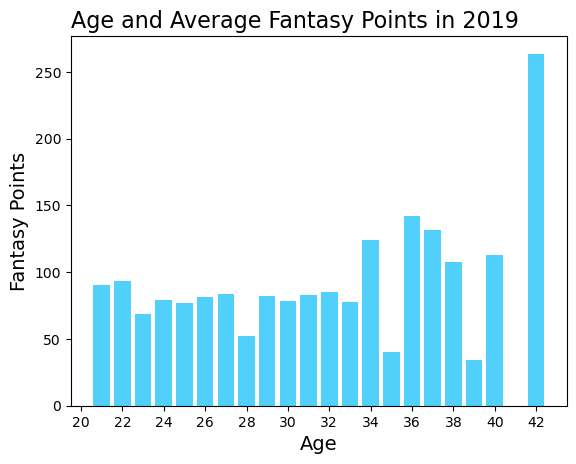

In [101]:
plt.bar(x = AverageFantasyPoints2019.index,
        height = list(AverageFantasyPoints2019),
        color = blue_1)
plt.title(label = "Age and Average Fantasy Points in 2019",
          loc = "left",
          fontsize = 16)
plt.xticks(np.arange(min(MainDF2019["Age"]) - 1, max(MainDF2019["Age"])  + 1 ,2))

plt.xlabel(xlabel = "Age",
           fontsize = 14)
plt.ylabel(ylabel = "Fantasy Points",
           fontsize = 14)

Text(0, 0.5, 'Fantasy Points')

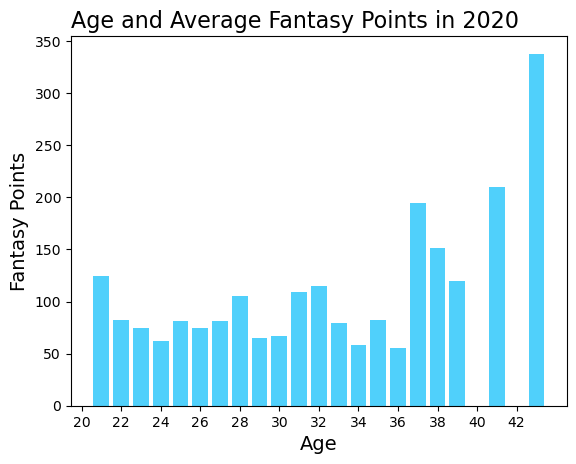

In [102]:
plt.bar(x = AverageFantasyPoints2020.index,
        height = list(AverageFantasyPoints2020),
        color = blue_1)
plt.title(label = "Age and Average Fantasy Points in 2020",
          loc = "left",
          fontsize = 16)
plt.xticks(np.arange(min(MainDF2020["Age"]) - 1, max(MainDF2020["Age"])  + 1 ,2))

plt.xlabel(xlabel = "Age",
           fontsize = 14)
plt.ylabel(ylabel = "Fantasy Points",
           fontsize = 14)

Text(0, 0.5, 'Fantasy Points')

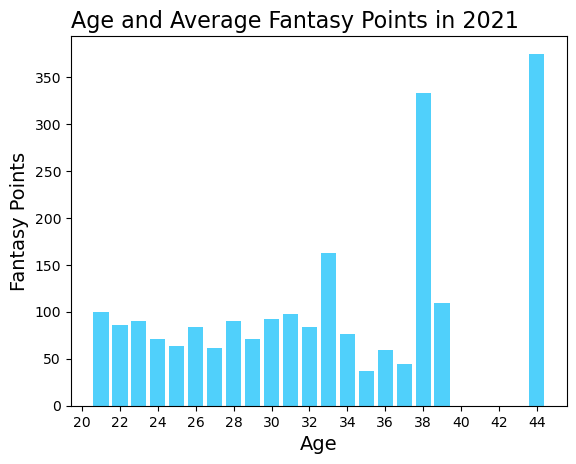

In [103]:
plt.bar(x = AverageFantasyPoints2021.index,
        height = list(AverageFantasyPoints2021),
        color = blue_1)
plt.title(label = "Age and Average Fantasy Points in 2021",
          loc = "left",
          fontsize = 16)
plt.xticks(np.arange(min(MainDF2021["Age"]) - 1, max(MainDF2021["Age"])  + 1 ,2))

plt.xlabel(xlabel = "Age",
           fontsize = 14)
plt.ylabel(ylabel = "Fantasy Points",
           fontsize = 14)

#### 2.2.c.) Average fantasy by age and position

In [64]:
MainDF.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
0,1,Todd Gurley,LAR,RB,23,15,15,0,0,0,...,64,788,12.31,6,5,2,383.3,GurlTo01,1.0,2017
1,2,Russell Wilson,SEA,QB,29,16,16,339,553,3983,...,0,0,0.00,0,14,3,347.9,WilsRu00,1.0,2017
2,3,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,...,85,655,7.71,2,3,2,341.6,BellLe00,2.0,2017
3,4,Alvin Kamara,NOR,RB,22,16,3,0,0,0,...,81,826,10.20,5,1,1,320.4,KamaAl00,3.0,2017
4,5,Antonio Brown,PIT,WR,29,14,14,0,0,0,...,101,1533,15.18,9,4,0,310.3,BrowAn04,1.0,2017


In [597]:
MainDF2020["Age"]

1641    24
1642    37
1643    23
1644    25
1645    25
        ..
2212    39
2213    27
2214    26
2215    27
2216    23
Name: Age, Length: 576, dtype: int64

In [602]:
MainDF2019["Age"].unique()

array([23, 22, 26, 31, 24, 25, 36, 27, 30, 34, 42, 33, 28, 37, 38, 40, 29,
       32, 21, 35, 39])

(array([56., 60., 85., 82., 78., 61., 99., 13., 15., 14.,  9.,  5.,  6.,
         7.,  1.,  2.,  0.,  0.,  0.,  1.]),
 array([21.  , 22.15, 23.3 , 24.45, 25.6 , 26.75, 27.9 , 29.05, 30.2 ,
        31.35, 32.5 , 33.65, 34.8 , 35.95, 37.1 , 38.25, 39.4 , 40.55,
        41.7 , 42.85, 44.  ]),
 <BarContainer object of 20 artists>)

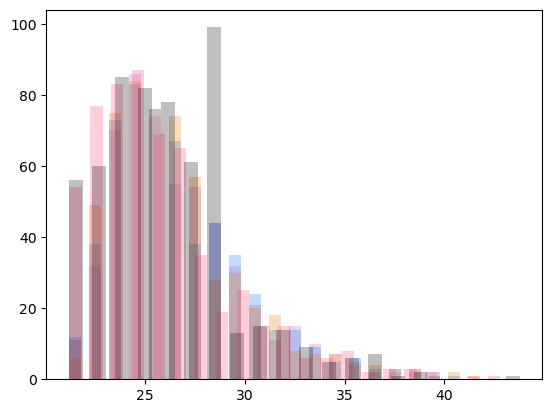

In [616]:
plt.hist(MainDF2017["Age"],
         bins = len(MainDF2017["Age"].unique()),
         color = pink_2,
         alpha = .25,
         rwidth = .6)
plt.hist(MainDF2018["Age"],
         bins = len(MainDF2018["Age"].unique()),
         color = blue_2,
         alpha = .25,
         rwidth=.6)
plt.hist(MainDF2019["Age"],
         bins = len(MainDF2019["Age"].unique()),
         color = orange_2,
         alpha = .25,
         rwidth=.6)
plt.hist(MainDF2020["Age"],
         bins = len(MainDF2020["Age"].unique()),
         color = red_2,
         alpha = .25,
         rwidth=.6)
plt.hist(MainDF2021["Age"],
         bins = len(MainDF2021["Age"].unique()),
         color = "black",
         alpha = .25,
         rwidth=.6)

In [627]:
int(2.0)

2

(array([12., 44., 60., 85., 82., 78., 61., 57., 42., 13., 15., 14.,  9.,
         5.,  6.,  6.,  1.,  1.,  2.,  0.,  0.,  0.,  1.]),
 array([21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33.,
        34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44.]),
 <BarContainer object of 23 artists>)

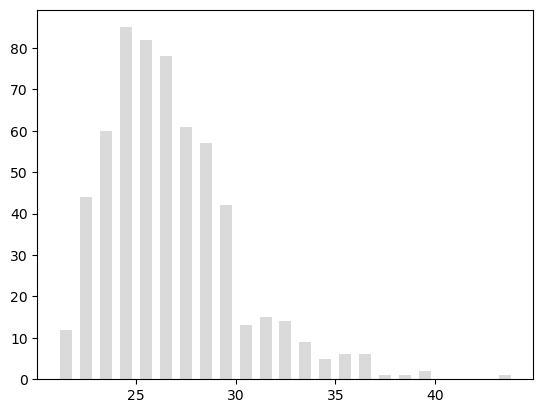

In [633]:
plt.hist(MainDF2021["Age"],
         bins = 23,#int((max(MainDF2021["Age"]) - min(MainDF2021["Age"]))/len(MainDF2021["Age"].unique())),
         color = light_gray_2,
         alpha = .75,
         rwidth=.6)

In [617]:
MainDF2021.groupby(by="Age").count()["Player"]

Age
21    12
22    44
23    60
24    85
25    82
26    78
27    61
28    57
29    42
30    13
31    15
32    14
33     9
34     5
35     6
36     6
37     1
38     1
39     2
44     1
Name: Player, dtype: int64

In [166]:
#QB_DF = MainDF[MainDF["FantPos"] == "QB"]
QB_DF = CleanedMainDF[CleanedMainDF["FantPos"] == "QB"]

RB_DF = MainDF[MainDF["FantPos"] == "RB"]
WR_DF = MainDF[MainDF["FantPos"] == "WR"]
TE_DF = MainDF[MainDF["FantPos"] == "TE"]

In [167]:
QB_AverageFantasyPoints = QB_DF.groupby(by = "Age").mean()["PPR"]
RB_AverageFantasyPoints = RB_DF.groupby(by = "Age").mean()["PPR"]
WR_AverageFantasyPoints = WR_DF.groupby(by = "Age").mean()["PPR"]
TE_AverageFantasyPoints = TE_DF.groupby(by = "Age").mean()["PPR"]

/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_9766/639451446.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  QB_AverageFantasyPoints = QB_DF.groupby(by = "Age").mean()["PPR"]
/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_9766/639451446.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  RB_AverageFantasyPoints = RB_DF.groupby(by = "Age").mean()["PPR"]
/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_9766/639451446.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Eith

Text(0, 0.5, 'Fantasy Points')

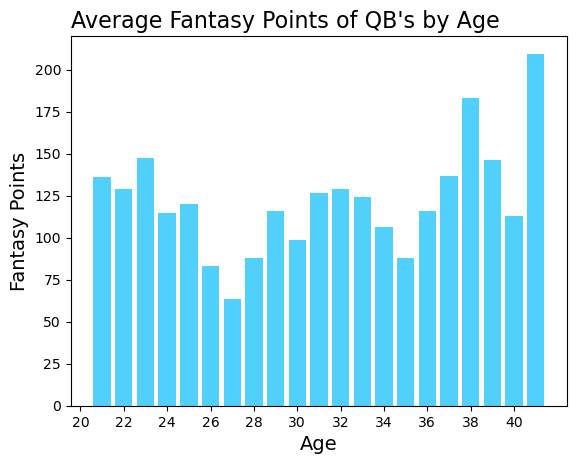

In [168]:
plt.bar(x = QB_AverageFantasyPoints.index,
        height = list(QB_AverageFantasyPoints),
        color = blue_1)
plt.title(label = "Average Fantasy Points of QB's by Age",
          loc = "left",
          fontsize = 16)
plt.xticks(np.arange(min(QB_DF["Age"]) - 1, max(QB_DF["Age"])  + 1 ,2))

plt.xlabel(xlabel = "Age",
           fontsize = 14)
plt.ylabel(ylabel = "Fantasy Points",
           fontsize = 14)

Text(0, 0.5, 'Fantasy Points')

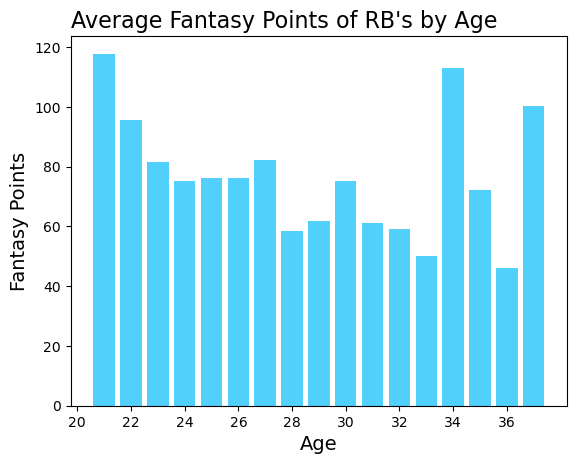

In [88]:
plt.bar(x = RB_AverageFantasyPoints.index,
        height = list(RB_AverageFantasyPoints),
        color = blue)
plt.title(label = "Average Fantasy Points of RB's by Age",
          loc = "left",
          fontsize = 16)
plt.xticks(np.arange(min(RB_DF["Age"]) - 1, max(RB_DF["Age"])  + 1 ,2))

plt.xlabel(xlabel = "Age",
           fontsize = 14)
plt.ylabel(ylabel = "Fantasy Points",
           fontsize = 14)

Text(0, 0.5, 'Fantasy Points')

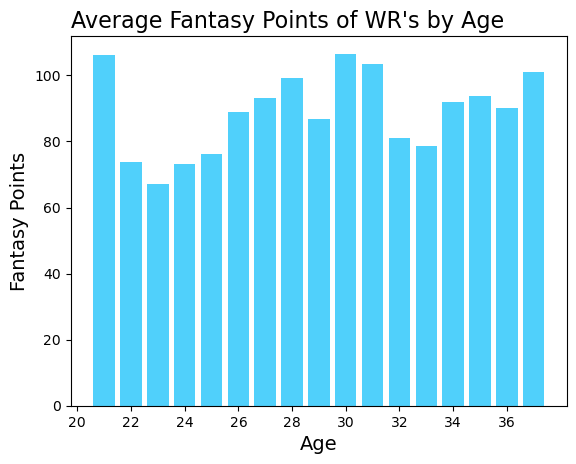

In [89]:
plt.bar(x = WR_AverageFantasyPoints.index,
        height = list(WR_AverageFantasyPoints),
        color = blue)
plt.title(label = "Average Fantasy Points of WR's by Age",
          loc = "left",
          fontsize = 16)
plt.xticks(np.arange(min(WR_DF["Age"]) - 1, max(WR_DF["Age"])  + 1 ,2))

plt.xlabel(xlabel = "Age",
           fontsize = 14)
plt.ylabel(ylabel = "Fantasy Points",
           fontsize = 14)

Text(0, 0.5, 'Fantasy Points')

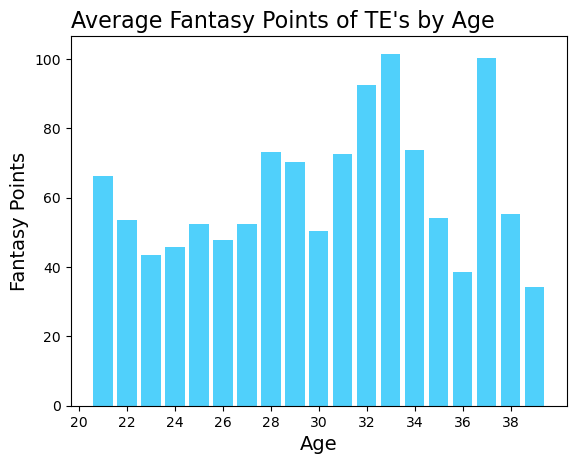

In [91]:
plt.bar(x = TE_AverageFantasyPoints.index,
        height = list(TE_AverageFantasyPoints),
        color = blue)
plt.title(label = "Average Fantasy Points of TE's by Age",
          loc = "left",
          fontsize = 16)
plt.xticks(np.arange(min(TE_DF["Age"]) - 1, max(TE_DF["Age"])  + 1 ,2))

plt.xlabel(xlabel = "Age",
           fontsize = 14)
plt.ylabel(ylabel = "Fantasy Points",
           fontsize = 14)

In [550]:
QB_AverageFantasyPoints.head()

Age
21    135.880000
22    128.961905
23    147.715000
24    114.794118
25    120.302381
Name: PPR, dtype: float64

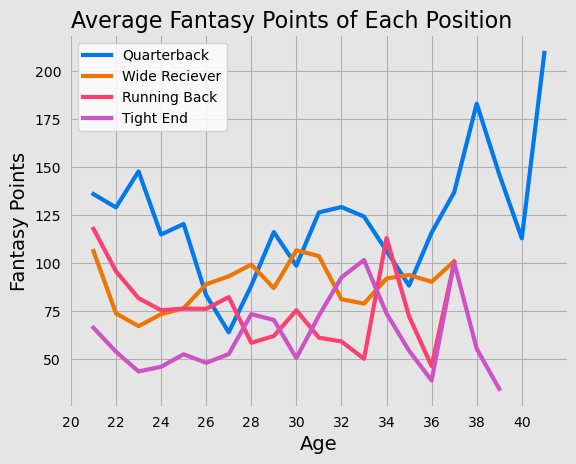

In [375]:
Plot, Axis = plt.subplots()


Plot.patch.set_facecolor(light_gray)
Axis.set_facecolor(light_gray)

Axis.plot(QB_AverageFantasyPoints.index,
        list(QB_AverageFantasyPoints),
        color = blue_2,
        linewidth = 3)
Axis.plot(WR_AverageFantasyPoints.index,
        list(WR_AverageFantasyPoints),
        color = orange_2,
        linewidth = 3)
Axis.plot(RB_AverageFantasyPoints.index,
        list(RB_AverageFantasyPoints),
        color = red_2,
        linewidth = 3)
Axis.plot(TE_AverageFantasyPoints.index,
        list(TE_AverageFantasyPoints),
        color = pink_2,
        linewidth = 3)

Axis.spines["top"].set_visible(False)
Axis.spines["right"].set_visible(False)
Axis.spines["bottom"].set_visible(False)
Axis.spines["left"].set_visible(False)

plt.title(label = "Average Fantasy Points of Each Position",
          loc = "left",
          fontsize = 16)
plt.xticks(np.arange(min(CleanedMainDF["Age"]) - 1, max(CleanedMainDF["Age"])  + 1 ,2))
plt.tick_params(left = False)
plt.tick_params(bottom = False)

plt.xlabel(xlabel = "Age",
           fontsize = 14)
plt.ylabel(ylabel = "Fantasy Points",
           fontsize = 14)

plt.legend(["Quarterback", "Wide Reciever","Running Back","Tight End"], 
           loc = "best")

plt.grid()

### 2.3.) The points of all the players over 2017-2022.

In [169]:
MainDF.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
0,1,Todd Gurley,LAR,RB,23,15,15,0,0,0,...,64,788,12.31,6,5,2,383.3,GurlTo01,1.0,2017
1,2,Russell Wilson,SEA,QB,29,16,16,339,553,3983,...,0,0,0.00,0,14,3,347.9,WilsRu00,1.0,2017
2,3,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,...,85,655,7.71,2,3,2,341.6,BellLe00,2.0,2017
3,4,Alvin Kamara,NOR,RB,22,16,3,0,0,0,...,81,826,10.20,5,1,1,320.4,KamaAl00,3.0,2017
4,5,Antonio Brown,PIT,WR,29,14,14,0,0,0,...,101,1533,15.18,9,4,0,310.3,BrowAn04,1.0,2017


3.376337028916534

In [199]:
print(np.std(MainDF2017["Age"]))
print(np.std(MainDF2018["Age"]))
print(np.std(MainDF2019["Age"]))
print(np.std(MainDF2019["Age"]))
print(np.std(MainDF2020["Age"]))

age_sd = np.std(MainDF["Age"])
average_age = MainDF["Age"].mean()
print("- - - -")
print(age_sd)
print(average_age)

3.321277058553964
3.4369803701675146
3.453472449990409
3.453472449990409
3.4833013348864728
- - - -
3.376337028916534
26.151711924439198


In [188]:
MainDF["Age"].quantile([.25,.5,.75])

0.25    24.0
0.50    25.0
0.75    28.0
Name: Age, dtype: float64

In [209]:
AllPlayersSD_DF = MainDF[(MainDF["Age"] <= average_age + age_sd/2) &
                        (MainDF["Age"] >= average_age - age_sd/2)]

all_players_sd = AllPlayersSD_DF["Player"].unique()
len(all_players_sd)

665

In [185]:
all_players = MainDF["Player"].unique()
#all_players = ["Todd Gurley","Russell Wilson"]
len(all_players)

1209

Text(0, 0.5, 'Fantasy Points')

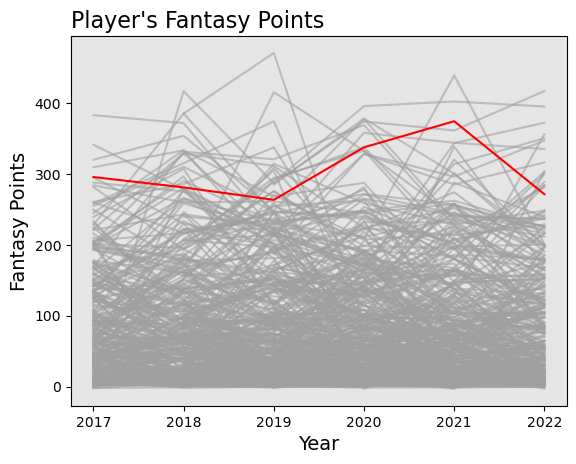

In [210]:
plt.axes().set_facecolor(light_gray)

for player in all_players_sd:

    DF = MainDF[MainDF["Player"] == player]

    plt.plot(DF["Year"],
             DF["PPR"],
             color = gray,
             alpha = .6)
    
plt.plot(MainDF[MainDF["Player"] == "Tom Brady"]["Year"],
         MainDF[MainDF["Player"] == "Tom Brady"]["PPR"],
         color = "red")
plt.title(label = "Player's Fantasy Points",
          loc = "Left",
          fontsize = 16)
plt.xlabel(xlabel = "Year",
           fontsize = 14)
plt.ylabel(ylabel = "Fantasy Points",
           fontsize = 14)

In [78]:
QB_DF.groupby(by = "Player").mean()["Age"].sort_values(ascending=False)

/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_9766/579528687.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  QB_DF.groupby(by = "Player").mean()["Age"].sort_values(ascending=False)


Player
Tom Brady        42.500000
Drew Brees       39.500000
Josh McCown      39.000000
Carson Palmer    38.000000
Matt Schaub      38.000000
                   ...    
Josh Rosen       22.333333
Kellen Mond      22.000000
Sam Howell       22.000000
DeShone Kizer    21.500000
Trey Lance       21.500000
Name: Age, Length: 150, dtype: float64

In [140]:
MainDF2022.groupby(by = "FantPos").count()

,Rk,Player,Tm,Age,G,GS,Cmp,Att,Yds,TD,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
FantPos,,,,,,,,,,,,,,,,,,,,,
QB,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
RB,167,167,167,167,167,167,167,167,167,167,...,167,167,167,167,167,167,167,167,167,167
TE,118,118,118,118,118,118,118,118,118,118,...,118,118,118,118,118,118,118,118,118,118
WR,227,227,227,227,227,227,227,227,227,227,...,227,227,227,227,227,227,227,227,227,227


In [133]:
QB_DF[QB_DF["Age"] >= 36].groupby(by = "Player").count()

,Rk,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Rodgers,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Alex Smith,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Ben Roethlisberger,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Brian Hoyer,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Carson Palmer,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Chad Henne,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Chase Daniel,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Colt McCoy,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Drew Brees,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [129]:
QB_DF[QB_DF["Age"] <= 36]

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
1,2,Russell Wilson,SEA,QB,29,16,16,339,553,3983,...,0,0,0.0,0,14,3,347.9,WilsRu00,1.0,2017
6,7,Cam Newton,CAR,QB,28,16,16,291,492,3302,...,0,0,0.0,0,9,1,299.5,NewtCa00,2.0,2017
9,10,Alex Smith,KAN,QB,33,15,15,341,505,4042,...,0,0,0.0,0,1,1,295.2,SmitAl03,4.0,2017
12,13,Carson Wentz,PHI,QB,25,13,13,265,440,3296,...,0,0,0.0,0,9,3,281.7,WentCa00,5.0,2017
14,15,Kirk Cousins,WAS,QB,29,16,16,347,540,4093,...,0,0,0.0,0,13,5,277.6,CousKi00,6.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3377,567,Jacob Eason,CAR,QB,25,1,0,3,5,59,...,0,0,0.0,0,0,0,0.4,EasoJa00,78.0,2022
3379,569,Case Keenum,BUF,QB,34,2,0,2,7,8,...,0,0,0.0,0,0,0,0.3,KeenCa00,79.0,2022
3383,573,Nate Sudfeld,DET,QB,29,2,0,0,0,0,...,0,0,0.0,0,0,0,-0.4,SudfNa00,80.0,2022
3386,576,C.J. Beathard,JAX,QB,29,4,0,7,11,35,...,0,0,0.0,0,0,0,-1.0,BeatC.00,82.0,2022


In [68]:
QB_DF.groupby(by = "Age").mean()["PPR"]

/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_9766/4081416029.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  QB_DF.groupby(by = "Age").mean()["PPR"]


Age
21    135.880000
22    128.961905
23    147.715000
24    114.794118
25    120.302381
26     83.166667
27     63.805128
28     88.150000
29    116.077419
30     98.561538
31    126.361111
32    129.125000
33    124.194444
34    106.250000
35     88.193333
36    115.814286
37    136.820000
38    183.033333
39    146.200000
40    173.833333
41    245.400000
42    263.700000
43    337.900000
44    374.700000
45    271.700000
Name: PPR, dtype: float64

### 2.4.) Total Fantasy Points by Team

Super Bowl Winners

- **2017 PHI** (Philadalphia Eagles)
- **2018 NWE** (New England Patriots)
- **2019 KAN** (Kansas City Chiefs)
- **2020 TAM** (Tampa Bay Buccaneers)
- **2021 LAR** (Los Angeles Rams)
- **2022 KAN** (Kansas City Chiefs)

In [384]:
MainDF.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
0,1,Todd Gurley,LAR,RB,23,15,15,0,0,0,...,64,788,12.31,6,5,2,383.3,GurlTo01,1.0,2017
1,2,Russell Wilson,SEA,QB,29,16,16,339,553,3983,...,0,0,0.00,0,14,3,347.9,WilsRu00,1.0,2017
2,3,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,...,85,655,7.71,2,3,2,341.6,BellLe00,2.0,2017
3,4,Alvin Kamara,NOR,RB,22,16,3,0,0,0,...,81,826,10.20,5,1,1,320.4,KamaAl00,3.0,2017
4,5,Antonio Brown,PIT,WR,29,14,14,0,0,0,...,101,1533,15.18,9,4,0,310.3,BrowAn04,1.0,2017


In [385]:
TeamDF = MainDF[(MainDF["Tm"] != "2TM") &
                (MainDF["Tm"] != "3TM")
                ]
TeamDF.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
0,1,Todd Gurley,LAR,RB,23,15,15,0,0,0,...,64,788,12.31,6,5,2,383.3,GurlTo01,1.0,2017
1,2,Russell Wilson,SEA,QB,29,16,16,339,553,3983,...,0,0,0.00,0,14,3,347.9,WilsRu00,1.0,2017
2,3,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,...,85,655,7.71,2,3,2,341.6,BellLe00,2.0,2017
3,4,Alvin Kamara,NOR,RB,22,16,3,0,0,0,...,81,826,10.20,5,1,1,320.4,KamaAl00,3.0,2017
4,5,Antonio Brown,PIT,WR,29,14,14,0,0,0,...,101,1533,15.18,9,4,0,310.3,BrowAn04,1.0,2017


In [386]:
# Create a series grouped by team and year

TeamFantasyPointsSeries = TeamDF.groupby(by = ["Tm","Year"]).sum()["PPR"]

# Create a list of all the unique teams

all_teams = TeamDF["Tm"].unique()


/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_9766/2549779987.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  TeamFantasyPointsSeries = TeamDF.groupby(by = ["Tm","Year"]).sum()["PPR"]


In [538]:
TeamDF.groupby(by = "Year").mean()["PPR"]

/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_9766/1929060340.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  TeamDF.groupby(by = "Year").mean()["PPR"]


Year
2017    79.682136
2018    83.445541
2019    81.829081
2020    82.690941
2021    81.232337
2022    78.935401
Name: PPR, dtype: float64

In [549]:
TeamFantasyPointsSeries["ARI",2017]

1092.2

In [546]:
all_years = [2017,2018,2019,2020,2021,2022]

In [ ]:
for year in all_years:
    for team in all_teams:
        total_for_team = TeamFantasyPointsSeries[team,year]
        total_per_year = 


In [554]:
TeamFantasyPointsSeries

Tm   Year
ARI  2017    1092.2
     2018     975.0
     2019    1123.5
     2020    1533.0
     2021    1516.5
              ...  
WAS  2018    1093.0
     2019    1104.9
     2020    1295.6
     2021    1336.6
     2022    1344.0
Name: PPR, Length: 192, dtype: float64

In [556]:
TeamFantasyPointsSeries["OAK",2019]

1335.7

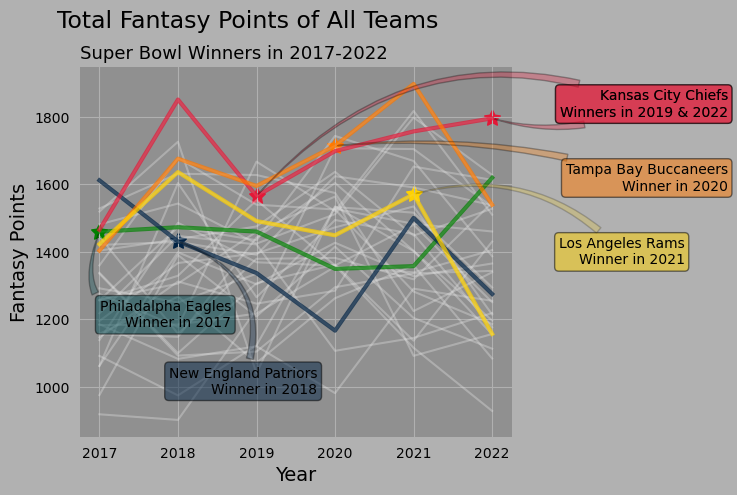

In [586]:
Plot2, Axis2 = plt.subplots()

Plot2.patch.set_facecolor(gray_2)
Axis2.set_facecolor(gray_1)

# Plot lines for all teams

for team in all_teams:
    
    # An array for the x-axis that contains the years (Not all teams are in all of 2017-2022)

    years = TeamFantasyPointsSeries[team].index

    # An array for the y-axis that contains points

    points_by_team = []

    for year in years:
        
        # Get the total fantasy points of each team at a specific year

        total_points = TeamFantasyPointsSeries[team, year]

        points_by_team.append(total_points)

    # Plot each team's total fantasy points
    
    plt.plot(years,
             points_by_team,
             color = light_gray,
             alpha = .35)
    
# Plot the lines of Super Bowl Winners
    
plt.plot(TeamFantasyPointsSeries["PHI"].index,
         list(TeamFantasyPointsSeries["PHI"]),
         color = "green",
         linewidth = 3,
         alpha = .7)

plt.plot(TeamFantasyPointsSeries["NWE"].index,
         list(TeamFantasyPointsSeries["NWE"]),
         color = blue_3,
         linewidth = 3,
         alpha = .7)

plt.plot(TeamFantasyPointsSeries["KAN"].index,
         list(TeamFantasyPointsSeries["KAN"]),
         color = red_3,
         linewidth = 3,
         alpha = .7)

plt.plot(TeamFantasyPointsSeries["TAM"].index,
         list(TeamFantasyPointsSeries["TAM"]),
         color = orange_3,
         linewidth = 3,
         alpha = .7)

plt.plot(TeamFantasyPointsSeries["LAR"].index,
         list(TeamFantasyPointsSeries["LAR"]),
         color = yellow_3,
         linewidth = 3,
         alpha = .7)


# Plot the points of Super Bowl Winners
    
plt.scatter(x = 2017,
            y = TeamFantasyPointsSeries["PHI", 2017],
            color = "green",
            s = 140,
            marker = (5,1))

plt.scatter(x = 2018,
            y = TeamFantasyPointsSeries["NWE", 2018],
            color = blue_3,
            s = 140,
            marker = (5,1))

plt.scatter(x = 2019,
            y = TeamFantasyPointsSeries["KAN", 2019],
            color = red_3,
            s = 140,
            marker = (5,1))

plt.scatter(x = 2020,
            y = TeamFantasyPointsSeries["TAM", 2020],
            color = orange_3,
            s = 140,
            marker = (5,1))

plt.scatter(x = 2021,
            y = TeamFantasyPointsSeries["LAR", 2021],
            color = yellow_3,
            s = 140,
            marker = (5,1))

plt.scatter(x = 2022,
            y = TeamFantasyPointsSeries["KAN", 2022],
            color = red_3,
            s = 140,
            marker = (5,1))

# Graph the average line

#plt.plot(TeamDF.groupby(by = "Year").mean()["PPR"].index,
 #        TeamDF.groupby(by = "Year").mean()["PPR"],
  #       color = "black",
  #       linewidth = 3,
  #       alpha = .7)

# Annotation of Philadalphia Eagles

Axis2.annotate(text = "Philadalpha Eagles\nWinner in 2017",
               xy = (2017,TeamFantasyPointsSeries["PHI",2017]),
               xycoords = "data",
               xytext = (.35,.33),
               textcoords = "axes fraction",
               size = 10,
               ha = "right",
               va = "center",
               bbox = dict(boxstyle = "round",
                           alpha = 0.5,
                           facecolor = green_3),
               arrowprops = dict(arrowstyle = "wedge, tail_width = .5",
                                 alpha = 0.3,
                                 connectionstyle= "arc3, rad = -0.8",
                                 facecolor = green_3))

# Annotation for New England Patriots

Axis2.annotate(text = "New England Patriors\nWinner in 2018",
               xy = (2018,TeamFantasyPointsSeries["NWE",2018]),
               xycoords = "data",
               xytext = (.55,.15),
               textcoords = "axes fraction",
               size = 10,
               ha = "right",
               va = "center",
               bbox = dict(boxstyle = "round",
                           alpha = 0.5,
                           facecolor = blue_3),
               arrowprops = dict(arrowstyle = "wedge, tail_width = .5",
                                 alpha = 0.3,
                                 connectionstyle = "arc3, rad = 0.5",
                                 facecolor = blue_3))

# Annotation for Kansas City Chiefs

Axis2.annotate(text = "Kansas City Chiefs\nWinners in 2019 & 2022",
               xy = (2022,TeamFantasyPointsSeries["KAN",2022]),
               xycoords = "data",
               xytext = (1.5,.9),
               textcoords = "axes fraction",
               size = 10,
               ha = "right",
               va = "center",
               bbox = dict(boxstyle = "round",
                           alpha = 0.5,
                           facecolor = red_3),
               arrowprops = dict(arrowstyle = "wedge, tail_width=.5",
                                 alpha = 0.3,
                                 connectionstyle= "arc3, rad = -0.2",
                                 facecolor = red_3))

Axis2.annotate(text = "Kansas City Chiefs\nWinners in 2019 & 2022",
               xy = (2019,TeamFantasyPointsSeries["KAN",2019]),
               xycoords = "data",
               xytext = (1.5,.9),
               textcoords = "axes fraction",
               size = 10,
               ha = "right",
               va = "center",
               bbox = dict(boxstyle = "round",
                           alpha = 0.5,
                           facecolor = red_3),
               arrowprops = dict(arrowstyle = "wedge, tail_width = .5",
                                 alpha = 0.3,
                                 connectionstyle = "arc3, rad = 0.35",
                                 facecolor = red_3))

# Annotation for Tampa Bay Buccaneers

Axis2.annotate(text = "Tampa Bay Buccaneers\nWinner in 2020",
               xy = (2020,TeamFantasyPointsSeries["TAM",2020]),
               xycoords = "data",
               xytext = (1.5,.7),
               textcoords = "axes fraction",
               size = 10,
               ha = "right",
               va = "center",
               bbox = dict(boxstyle = "round",
                           alpha = 0.5,
                           facecolor = orange_3),
               arrowprops = dict(arrowstyle = "wedge, tail_width = .5",
                                 alpha = 0.3,
                                 connectionstyle = "arc3, rad = 0.1",
                                 facecolor = orange_3))

# Annotation for Los Angeles Rams

Axis2.annotate(text = "Los Angeles Rams\nWinner in 2021",
               xy = (2021,TeamFantasyPointsSeries["LAR",2021]),
               xycoords = "data",
               xytext = (1.4,.5),
               textcoords = "axes fraction",
               size = 10,
               ha = "right",
               va = "center",
               bbox = dict(boxstyle = "round",
                           alpha = 0.5,
                           facecolor = yellow_3),
               arrowprops = dict(arrowstyle = "wedge, tail_width = .5",
                                 alpha = 0.2,
                                 connectionstyle = "arc3, rad = 0.3",
                                 facecolor = yellow_3))



Axis2.spines["top"].set_visible(False)
Axis2.spines["right"].set_visible(False)
Axis2.spines["bottom"].set_visible(False)
Axis2.spines["left"].set_visible(False)

plt.suptitle("Total Fantasy Points of All Teams",
             ha = "right",
             x = .685,
             y = 1,
             fontsize = 17)
plt.title(label = "Super Bowl Winners in 2017-2022",
          loc = "left",
          fontsize = 13)
plt.xlabel(xlabel = "Year",
           fontsize = 14)
plt.ylabel(ylabel = "Fantasy Points",
           fontsize = 14)
plt.tick_params(left = False)
plt.tick_params(bottom = False)
plt.grid()
plt.subplots_adjust(right = .8)


## 3. Brainstorming

In [ ]:
# Create Summary Table for age and points


In [59]:
quartiles = MainDF["Age"].quantile([.25,.5,.75])
quartiles

0.25    24.0
0.50    25.0
0.75    28.0
Name: Age, dtype: float64

In [61]:
quartiles[.25]

24.0

In [64]:
NewMainDF = MainDF[(MainDF["Age"] >= quartiles[.25]) & 
                   (MainDF["Age"] <= quartiles[.75])]
NewMainDF

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
2,3,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,...,85,655,7.71,2,3,2,341.6,BellLe00,2.0,2017
5,6,DeAndre Hopkins,HOU,WR,25,15,15,0,0,0,...,96,1378,14.35,13,1,1,309.8,HopkDe00,2.0,2017
6,7,Cam Newton,CAR,QB,28,16,16,291,492,3302,...,0,0,0.00,0,9,1,299.5,NewtCa00,2.0,2017
10,11,Melvin Gordon,LAC,RB,24,16,16,0,0,0,...,58,476,8.21,4,1,0,288.1,GordMe00,5.0,2017
11,12,Keenan Allen,LAC,WR,25,16,15,0,0,0,...,102,1393,13.66,6,1,0,284.2,AlleKe00,3.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,564,Kylin Hill,GNB,RB,24,2,0,0,0,0,...,0,0,0.00,0,0,0,0.7,HillKy00,158.0,2022
3377,567,Jacob Eason,CAR,QB,25,1,0,3,5,59,...,0,0,0.00,0,0,0,0.4,EasoJa00,78.0,2022
3382,572,Jordan Howard,NOR,RB,28,2,0,0,0,0,...,0,0,0.00,0,0,0,0.1,HowaJo00,162.0,2022
3384,574,KaVontae Turpin,DAL,WR,26,17,0,0,0,0,...,1,9,9.00,0,3,2,-0.4,TurpKa00,218.0,2022


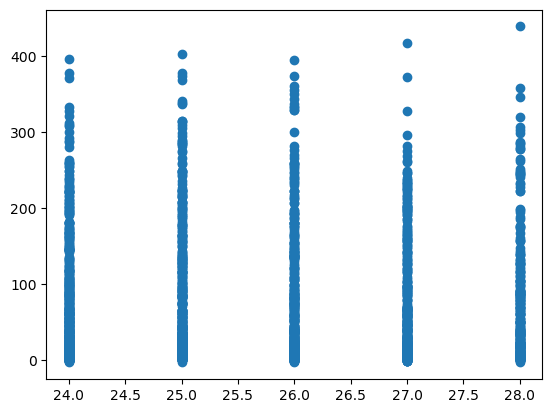

In [65]:
plt.scatter(x = NewMainDF["Age"],
            y = NewMainDF["PPR"])

In [53]:
MainDF2017["Age"].quantile([.25,.5,.75])

0.25    24.0
0.50    25.0
0.75    28.0
Name: Age, dtype: float64

In [46]:
print(f"Min age is {MainDF2017['Age'].min()}")
print(f"Max age is {MainDF2017['Age'].max()}")
print(f"Ave age is {MainDF2017['Age'].mean()}")
print(f"Median age is {MainDF2017['Age'].median()}")

Min age is 21
Max age is 40
Ave age is 26.170093457943924
Median age is 25.0


In [49]:
print(f"Min age is {MainDF2019['Age'].min()}")
print(f"Max age is {MainDF2019['Age'].max()}")
print(f"Ave age is {MainDF2019['Age'].mean()}")
print(f"Median age is {MainDF2019['Age'].median()}")

Min age is 21
Max age is 42
Ave age is 26.059245960502693
Median age is 25.0


In [50]:
print(f"Min age is {MainDF2018['Age'].min()}")
print(f"Max age is {MainDF2018['Age'].max()}")
print(f"Ave age is {MainDF2018['Age'].mean()}")
print(f"Median age is {MainDF2018['Age'].median()}")

Min age is 21
Max age is 41
Ave age is 26.169398907103826
Median age is 25.0


In [41]:
print(f"Min age is {MainDF['Age'].min()}")
print(f"Max age is {MainDF['Age'].max()}")
print(f"Ave age is {MainDF['Age'].mean()}")
print(f"Median age is {MainDF['Age'].median()}")

#MainDF["Age"].median()
#MainDF["Age"].mean()

Min age is 21
Max age is 45
Ave age is 26.151711924439198
Median age is 25.0


In [32]:
MainDF["Age"].mean()

26.151711924439198

In [29]:
linregress(MainDF["Age"],MainDF["PPR"])

LinregressResult(slope=1.9993011156380098, intercept=27.82040217008295, rvalue=0.07854472037136719, pvalue=4.712388628803248e-06, stderr=0.43608780654984935, intercept_stderr=11.499096234433024)

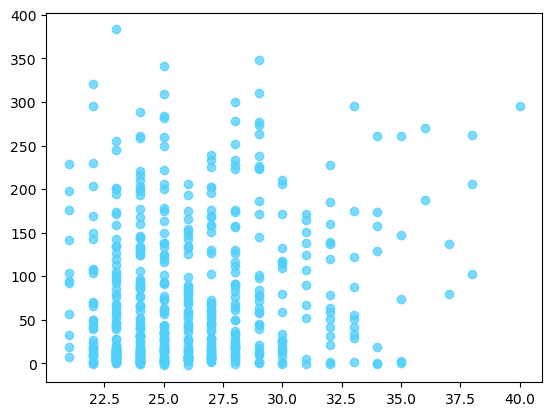

In [56]:
plt.scatter(x = MainDF2017["Age"],
            y = MainDF2017["PPR"],
            alpha = .75,
            color = blue)

In [77]:
AgeSeries2017 = MainDF2017.groupby(by = "Age").sum()["PPR"]
AgeSeries2017

/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_8031/3995466944.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  AgeSeries2017 = MainDF2017.groupby(by = "Age").sum()["PPR"]


Age
21    1149.5
22    2422.5
23    4456.0
24    6155.2
25    5522.8
26    3311.7
27    3825.5
28    3833.8
29    3788.0
30    1504.5
31    1072.2
32    1316.9
33     890.6
34     740.2
35     484.3
36     457.7
37     216.8
38     570.3
40     295.9
Name: PPR, dtype: float64

In [79]:
AgeSeries2017.index

Int64Index([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
            38, 40],
           dtype='int64', name='Age')

In [81]:
AgeSeries2017["Age"]

KeyError: 'Age'

In [92]:
min(MainDF2017["Age"])

21

In [98]:
list(range(0,10,2))

[0, 2, 4, 6, 8]

In [ ]:
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))

In [109]:
np.arange(21,45,3)

array([21, 24, 27, 30, 33, 36, 39, 42])

Text(0, 0.5, 'Fantasy Points')

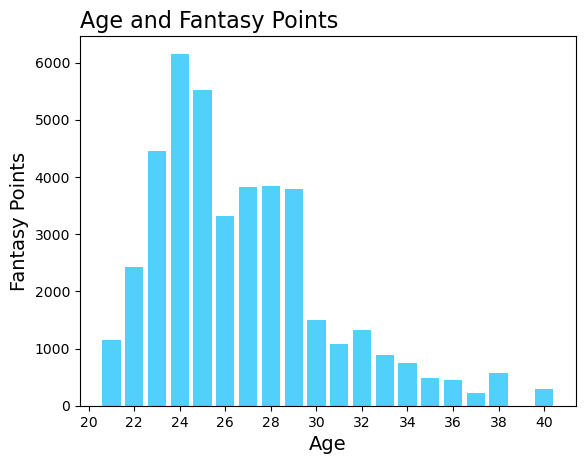

In [124]:
plt.bar(x = AgeSeries2017.index,
        height = list(AgeSeries2017),
        color = blue)
plt.title(label = "Age and Fantasy Points",
          loc = "left",
          fontsize = 16)
#plt.xlim(min(MainDF2017["Age"]) - 1, max(MainDF2017["Age"]) + 1)
plt.xticks(np.arange(min(MainDF2017["Age"]) - 1, max(MainDF2017["Age"])  + 1 ,2))

plt.xlabel(xlabel = "Age",
           fontsize = 14)
plt.ylabel(ylabel = "Fantasy Points",
           fontsize = 14)